In [1]:
from datetime import datetime

import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 定数
TEST_SIZE = 0.2
RANDOM_STATE = 123
MIN_SAMPLES_LEAF = 3

% matplotlib inline

In [2]:
# 診察予約を行った患者が当日に現れるかを記録したCSVファイルを取り込む
import_df = pd.read_csv('KaggleV2-May-2016.csv')
import_df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [3]:
# CSVファイルの確認
print('Total: {}件'.format(len(import_df.index)))
no_show_count = import_df['No-show'].value_counts()
print('Show: {}人 ({:.2%})'.format(no_show_count[0], no_show_count[0] / len(import_df.index)))
print('No-Show: {}人 ({:.2%})'.format(no_show_count[1], no_show_count[1] / len(import_df.index)))

Total: 110527件
Show: 88208人 (79.81%)
No-Show: 22319人 (20.19%)


# 機械学習の流れ

### 1. 目的変数の設定

### 2. 説明変数の設定

### 3. テストデータで学習(モデルの作成)

### 4. モデルの評価

### 5. 2～4を繰り返して精度を高める


In [4]:
# ◆ 1回目：数値データだけで学習
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# ２．説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

# ３．テストデータで学習
feature = training_df.ix[:, 'Age':]
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 79.99%
テストスコア: 79.44%


予想内訳:
         No-Show予想  Show予想
No-Show         39    4489
Show            55   17523


No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


In [5]:
# ◆ 2回目：文字データを数値に変換して追加
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# ２．説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

# -----------------------------------------------------------------------------------------------
training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))
# -----------------------------------------------------------------------------------------------

# ３．テストデータで学習
feature = training_df.ix[:, 'Age':]
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 86.93%
テストスコア: 79.24%


予想内訳:
         No-Show予想  Show予想
No-Show        496    4032
Show           557   17021


No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


In [6]:
# ◆ 3回目：有効になりそうな項目を追加
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# ２．説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
# training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
#     lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
# training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
#     lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))

# -----------------------------------------------------------------------------------------------
training_df['ScheduledMonth'] = import_df['ScheduledDay'].apply(lambda s: s[5: 7])
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(lambda s: s[8: 10])
training_df['ScheduledTime'] = import_df['ScheduledDay'].apply(lambda s: s[11: 13])
training_df['ScheduledWeekDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['AppointmentMonth'] = import_df['AppointmentDay'].apply(lambda s: s[5: 7])
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(lambda s: s[8: 10])
training_df['AppointmentWeekDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['DiffDays'] = import_df[['AppointmentDay', 'ScheduledDay']].apply(
    lambda x: (datetime.strptime(x[0][: 10], "%Y-%m-%d") - datetime.strptime(x[1][: 10], "%Y-%m-%d")).days, axis=1
)
# -----------------------------------------------------------------------------------------------

# ３．テストデータで学習
feature = training_df.ix[:, 'Age':]
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('2回目予想')
print('No-Show 予想率/正解率: 4.76%/47.10%\nShow 予想率/正解率: 95.24%/80.85%')
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 88.43%
テストスコア: 79.17%


予想内訳:
         No-Show予想  Show予想
No-Show        623    3905
Show           699   16879


No-Show 予想率/正解率: 5.98%/47.13%
Show 予想率/正解率: 94.02%/81.21%


2回目予想
No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


([<matplotlib.axis.YTick at 0x13e71208>,
 <a list of 17 Text yticklabel objects>)

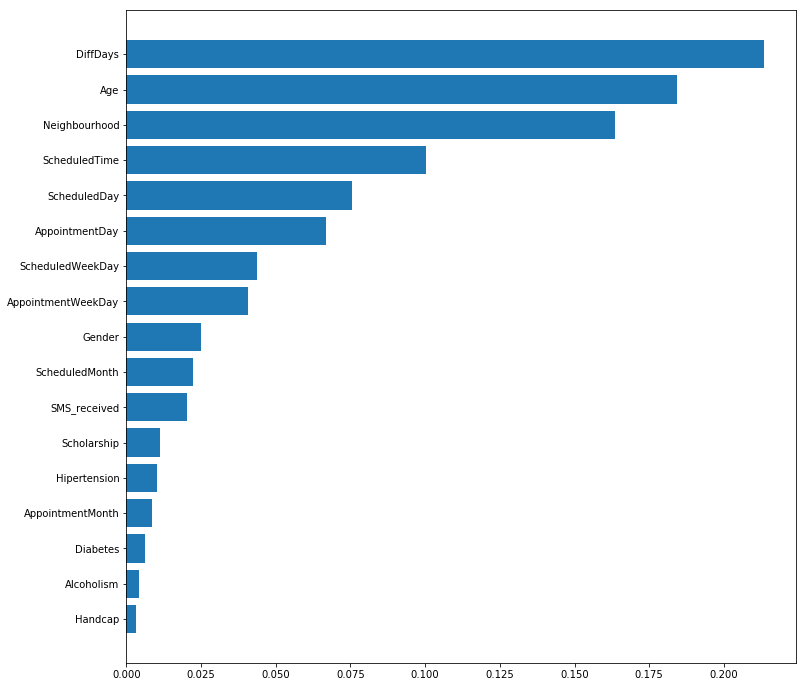

In [7]:
# 作成したモデルの中身を確認し、目的変数との相関が高い項目を見る。
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)


In [8]:
# ◆ 4回目：相関の低い項目を削除
# 学習・テストデータの作成
training_df = pd.DataFrame()

# １．目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# ２．説明変数の設定
training_df['Age'] = import_df['Age']
# training_df['Scholarship'] = import_df['Scholarship']
# training_df['Hipertension'] = import_df['Hipertension']
# training_df['Diabetes'] = import_df['Diabetes']
# training_df['Alcoholism'] = import_df['Alcoholism']
# training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
# training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
#     lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
# training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
#     lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))

training_df['ScheduledMonth'] = import_df['ScheduledDay'].apply(lambda s: s[5: 7])
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(lambda s: s[8: 10])
training_df['ScheduledTime'] = import_df['ScheduledDay'].apply(lambda s: s[11: 13])
training_df['ScheduledWeekDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
# training_df['AppointmentMonth'] = import_df['AppointmentDay'].apply(lambda s: s[5: 7])
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(lambda s: s[8: 10])
training_df['AppointmentWeekDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['DiffDays'] = import_df[['AppointmentDay', 'ScheduledDay']].apply(
    lambda x: (datetime.strptime(x[0][: 10], "%Y-%m-%d") - datetime.strptime(x[1][: 10], "%Y-%m-%d")).days, axis=1
)

# ３．テストデータで学習
feature = training_df.ix[:, 'Age':]
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# モデルの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# ４．モデルの評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('3回目予想')
print('No-Show 予想率/正解率: 5.98%/47.13%\nShow 予想率/正解率: 94.02%/81.21%')
print('\n')
print('2回目予想')
print('No-Show 予想率/正解率: 4.76%/47.10%\nShow 予想率/正解率: 95.24%/80.85%')
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 89.21%
テストスコア: 79.42%


予想内訳:
         No-Show予想  Show予想
No-Show        710    3818
Show           732   16846


No-Show 予想率/正解率: 6.52%/49.24%
Show 予想率/正解率: 93.48%/81.52%


3回目予想
No-Show 予想率/正解率: 5.98%/47.13%
Show 予想率/正解率: 94.02%/81.21%


2回目予想
No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


([<matplotlib.axis.YTick at 0x18089ba8>,
 <a list of 11 Text yticklabel objects>)

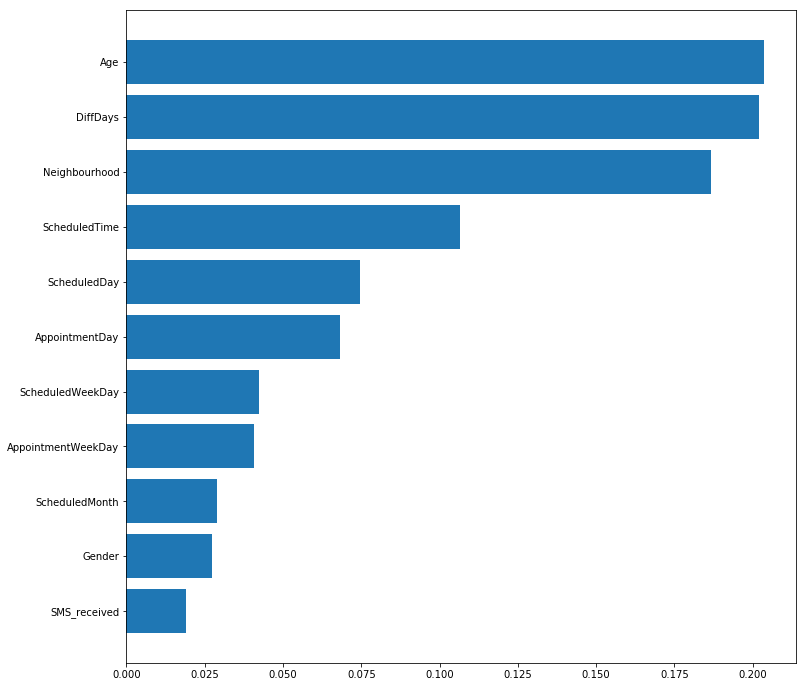

In [9]:
# 作成したモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)


In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# 最適なパラメータを調べる (http://data-science.gr.jp/implementation/iml_sklearn_random_forest.html)
parameters = {
    'n_estimators'      : [100, 200, 300],           # 決定木の数 デフォルト:10
#     'criterion'         : ['gini', 'entropy'],     # デフォルト:gini
    'max_depth'         : [10, 20, 40, 60, None],   #  深さの最大値 Error: max_depth <= 0
    'min_samples_split' : [10, 20, 40, 60, 100],    # 分岐をやめるサンプル数 Error: not 2 <= self.min_samples_split or not 0. < self.min_samples_split <= 1.
    'min_samples_leaf'  : [1, 5, 10],               # 最小限のサンプルの数 デフォルト:1
}

# f1_scoring = make_scorer(f1_score,  pos_label=1)
clf = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1), 
    parameters,
#     scoring=f1_scoring
)
clf.fit(training_feature, traininig_correct)

# 結果
print('Best parameters: {}'.format(clf.best_params_))
print('Best score: {:.3f}'.format(clf.best_score_))

print('学習スコア: {:.2%}'.format(clf.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(clf.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, clf.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.802
学習スコア: 87.84%
テストスコア: 80.37%


予想内訳:
         No-Show予想  Show予想
No-Show        443    4052
Show           287   17324


No-Show 予想率/正解率: 3.30%/60.68%
Show 予想率/正解率: 96.70%/81.04%


学習スコア: 89.21%
テストスコア: 79.42%


予想内訳:
         No-Show予想  Show予想
No-Show        710    3818
Show           732   16846


No-Show 予想率/正解率: 6.52%/49.24%
Show 予想率/正解率: 93.48%/81.52%
